In [1]:
# Import necessary libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Step 1: Load the dataset (already cleaned it)
df = pd.read_csv("/content/YoutubeCommentsDataSet.csv")

df.head()

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [3]:
df = df.dropna(subset=['Comment'])

In [4]:
print(df.columns)

Index(['Comment', 'Sentiment  '], dtype='object')


In [5]:
# Replace 'neg' with 0, 'pos' with 1, and 'nue' with 2
df['Sentiment  '] = df['Sentiment  '].replace({'negative': 0, 'neutral': 1, 'positive': 2})

df.head()

<ipython-input-5-eebd00edafc8>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sentiment  '] = df['Sentiment  '].replace({'negative': 0, 'neutral': 1, 'positive': 2})


,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,1
1,here in nz 50 of retailers don’t even have con...,0
2,i will forever acknowledge this channel with t...,2
3,whenever i go to a place that doesn’t take app...,0
4,apple pay is so convenient secure and easy to ...,2


In [6]:
import nltk
import pandas as pd
from nltk.corpus import stopwords

# Download the 'stopwords' dataset if not already present
nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Example usage
df['Comment'] = df['Comment'].apply(remove_stopwords)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Comment,Sentiment
0,lets forget apple pay 2014 required brand new ...,1
1,nz 50 retailers don’t even contactless credit ...,0
2,forever acknowledge channel help lessons ideas...,2
3,whenever go place doesn’t take apple pay doesn...,0
4,apple pay convenient secure easy use used kore...,2


In [7]:
# Step 2: Split the data into features (X) and target (y)
X = df['Comment']
y = df['Sentiment  ']

In [8]:
# Step 3: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Step 4: Convert text data into numerical features using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [10]:
# from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.svm import SVC
# from xgboost import XGBClassifier
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Step 5: Initialize selected models
models = {
    "Logistic Regression": LogisticRegression(multi_class='ovr', max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}


In [11]:
from sklearn.metrics import accuracy_score, classification_report

# Tüm modellerin doğruluk oranlarını ve classification report'larını saklayacağımız boş bir sözlük
model_accuracies = {}

# Modelleri sırayla eğitip test edelim
for name, model in models.items():
    print(f"Training and evaluating: {name}")
    model.fit(X_train_tfidf, y_train)                # Modeli eğit
    y_pred = model.predict(X_test_tfidf)              # Test setinde tahmin yap
    accuracy = accuracy_score(y_test, y_pred) * 100   # Doğruluğu yüzde cinsinden hesapla
    model_accuracies[name] = accuracy                 # Sonucu kaydet

    # Model için classification report al
    print(f"Accuracy: {accuracy:.2f}%")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))      # Detaylı rapor
    print("-" * 50)

# Sonuçları sıralayıp yazdıralım
print("\nModel Performans Karşılaştırması:")
sorted_accuracies = sorted(model_accuracies.items(), key=lambda x: x[1], reverse=True)

for name, acc in sorted_accuracies:
    print(f"{name}: {acc:.2f}%")

# En iyi modeli bulalım
best_model = sorted_accuracies[0]
print(f"\nEn iyi performansı gösteren model: {best_model[0]} -> {best_model[1]:.2f}%")



Training and evaluating: Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 75.01%
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.26      0.37       441
           1       0.63      0.55      0.59       912
           2       0.79      0.92      0.85      2320

    accuracy                           0.75      3673
   macro avg       0.69      0.58      0.60      3673
weighted avg       0.73      0.75      0.73      3673

--------------------------------------------------
Training and evaluating: K-Nearest Neighbors
Accuracy: 32.43%
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.02      0.04       441
           1       0.26      0.95      0.41       912
           2       0.85      0.14      0.24      2320

    accuracy                           0.32      3673
   macro avg       0.57      0.37      0.23      3673
weighted avg       0.67      0.32      0.26      3673

--------------------------------------------------
Training an

Model Karşılaştırma Metrikleri


,Accuracy,Precision,Recall,F1-Score,ROC AUC
Model,,,,,
LR,0.750068,0.689596,0.578199,0.604352,0.876502
KNN,0.324258,0.574843,0.367891,0.227815,0.546591
GB,0.677375,0.710836,0.432035,0.439736,0.828667


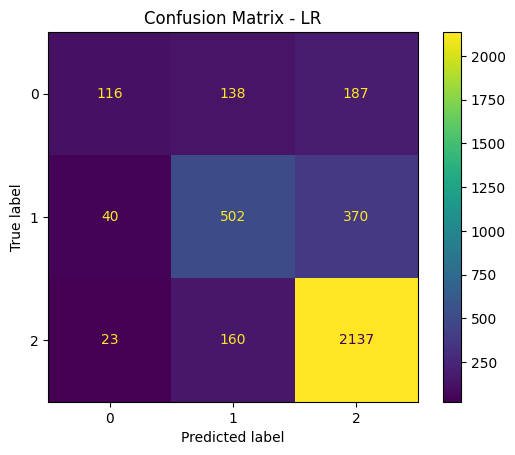

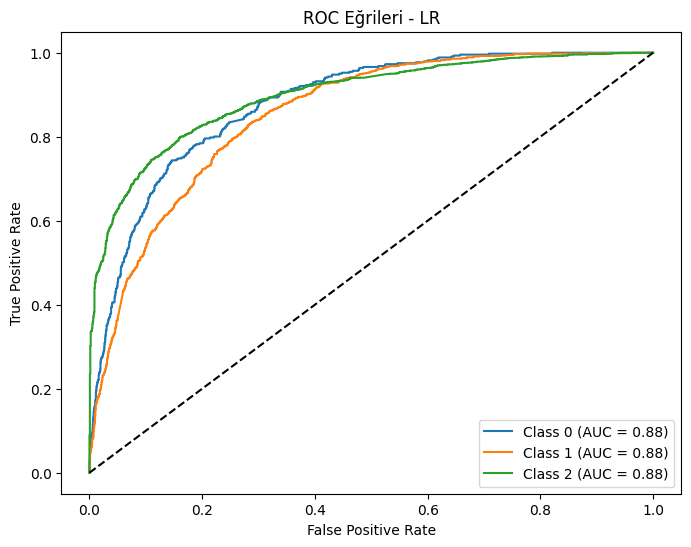

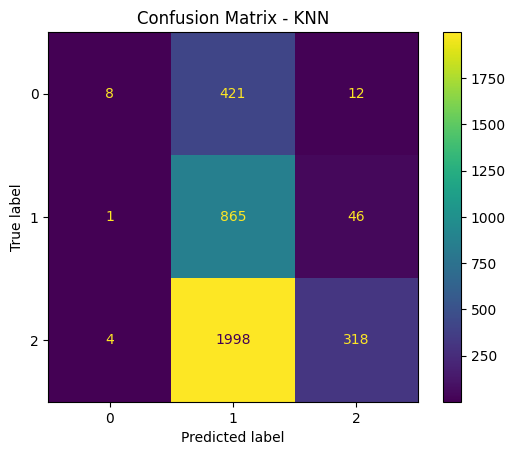

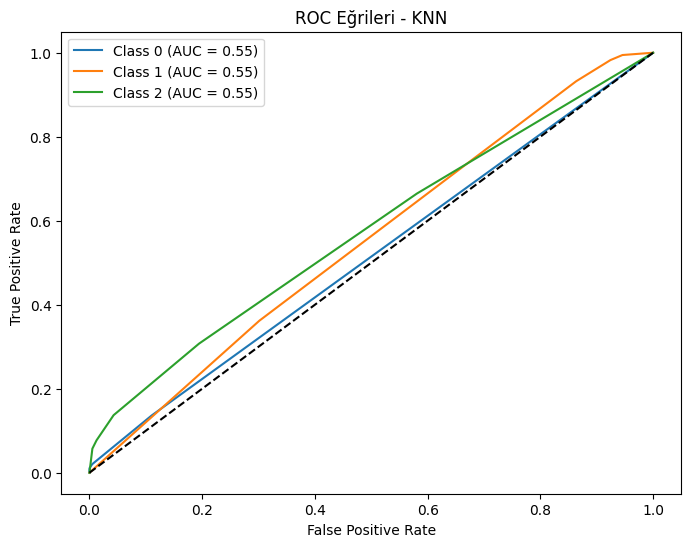

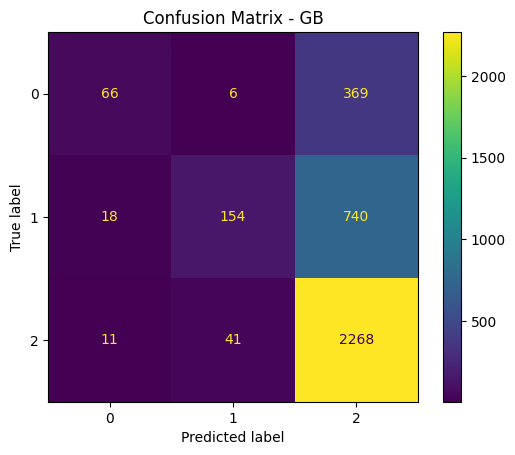

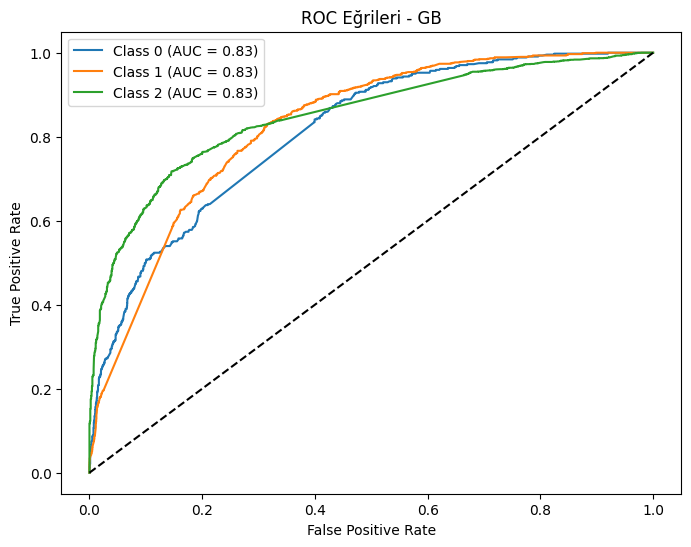

In [12]:
# Performans Metrikleri, Confusion Matrix ve ROC Eğrileri Ekleme

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve,
    ConfusionMatrixDisplay
)

# Modeller ve test verisi
# Use the trained models from the 'models' dictionary that was populated earlier
models_for_evaluation = {
    'LR': models["Logistic Regression"],      # Lojistik Regresyon modeliniz
    'KNN': models["K-Nearest Neighbors"],    # KNN modeliniz
    'GB': models["Gradient Boosting"]       # Gradient Boosting modeliniz
}

# Note: We need to use the TF-IDF transformed test data for prediction
y_pred_dict = {name: model.predict(X_test_tfidf) for name, model in models_for_evaluation.items()}
y_proba_dict = {name: model.predict_proba(X_test_tfidf) for name, model in models_for_evaluation.items()}

# Metrik hesaplama
metrics = []
# Since this is a multi-class problem, calculate metrics appropriately
for name in models_for_evaluation:
    y_pred = y_pred_dict[name]
    # For multi-class ROC AUC, we need the probability for each class and one-hot encoded true labels
    y_proba = y_proba_dict[name]
    y_test_one_hot = pd.get_dummies(y_test)

    # Check if the number of columns in y_proba matches the number of classes in y_test_one_hot
    if y_proba.shape[1] == y_test_one_hot.shape[1]:
        # Multi-class ROC AUC (one-vs-rest or one-vs-one)
        # Using 'ovr' strategy as it's more common for general multi-class
        try:
            auc = roc_auc_score(
                y_test_one_hot,
                y_proba,
                multi_class='ovr' # Use 'ovr' for one-vs-rest
            )
        except ValueError as e:
            print(f"Could not calculate ROC AUC for {name}: {e}")
            auc = None # Assign None if calculation fails
    else:
        print(f"Number of classes in y_proba ({y_proba.shape[1]}) does not match y_test_one_hot ({y_test_one_hot.shape[1]}) for {name}. Cannot calculate ROC AUC.")
        auc = None

    metrics.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'), # Use macro average for multi-class
        'Recall': recall_score(y_test, y_pred, average='macro'),     # Use macro average for multi-class
        'F1-Score': f1_score(y_test, y_pred, average='macro'),         # Use macro average for multi-class
        'ROC AUC': auc
    })

metrics_df = pd.DataFrame(metrics).set_index('Model')
# Assuming ace_tools is defined in the environment, otherwise print the dataframe
try:
    ace_tools.display_dataframe_to_user("Model Karşılaştırma Metrikleri", metrics_df)
except NameError:
    print("Model Karşılaştırma Metrikleri")
    display(metrics_df) # Use display from IPython to show the dataframe nicely

# Confusion Matrix ve ROC eğrileri
for name, model in models_for_evaluation.items():
    # Confusion Matrix
    # Ensure display_labels are the actual class labels
    disp = ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred_dict[name],
        display_labels=model.classes_ # Use the classes from the trained model
    )
    disp.ax_.set_title(f"Confusion Matrix - {name}")
    plt.show()

    # ROC Eğrisi (Multi-class)
    # ROC curve for multi-class is typically done on a per-class basis
    if y_proba_dict[name].shape[1] == y_test_one_hot.shape[1]:
        plt.figure(figsize=(8, 6))
        for i in range(y_test_one_hot.shape[1]):
            fpr, tpr, _ = roc_curve(y_test_one_hot.iloc[:, i], y_proba_dict[name][:, i])
            plt.plot(fpr, tpr, label=f'Class {model.classes_[i]} (AUC = {metrics_df.loc[name, "ROC AUC"]:.2f})') # You might need to adjust how AUC is displayed for multi-class

        plt.plot([0, 1], [0, 1], 'k--') # Random guess line
        plt.title(f"ROC Eğrileri - {name}")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.show()
    else:
        print(f"Cannot plot multi-class ROC curve for {name} due to mismatch in class probabilities and true labels.")

In [14]:
# Hiperparametre Tarama Sonuçları Tablosu
import pandas as pd
from sklearn.model_selection import GridSearchCV # Import GridSearchCV
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

# Define the model you want to tune (e.g., Logistic Regression)
model_to_tune = LogisticRegression(multi_class='ovr', max_iter=1000, random_state=42)

# Define the parameter grid to search over
# This is an example, you should define parameters relevant to your chosen model
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'] # Choose solvers compatible with 'ovr'
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_to_tune, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_tfidf, y_train)

# Assign the result of the grid search to the 'grid' variable
grid = grid_search

# Now the rest of your code should work
cv_df = pd.DataFrame(grid.cv_results_)[['params','mean_test_score','std_test_score','rank_test_score']]
params_df = pd.json_normalize(cv_df['params'])
res_df = pd.concat([params_df, cv_df.drop(columns=['params'])], axis=1)
res_df = res_df.sort_values('rank_test_score').reset_index(drop=True)

# Assuming ace_tools is defined in the environment, otherwise print the dataframe
try:
    ace_tools.display_dataframe_to_user("Hiperparametre Tarama Sonuçları", res_df)
except NameError:
    print("Hiperparametre Tarama Sonuçları")
    display(res_df) # Use display from IPython to show the dataframe nicely

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Hiperparametre Tarama Sonuçları


,C,solver,mean_test_score,std_test_score,rank_test_score
0,10.0,liblinear,0.644549,0.003901,1
1,10.0,lbfgs,0.642972,0.004768,2
2,100.0,lbfgs,0.629705,0.003871,3
3,100.0,liblinear,0.626369,0.004199,4
4,1.0,liblinear,0.597711,0.006439,5
5,1.0,lbfgs,0.597152,0.008259,6
6,0.1,liblinear,0.315823,0.003805,7
7,0.1,lbfgs,0.315334,0.003868,8


In [16]:
# Ön İşleme Adımlarının Karşılaştırması
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import pandas as pd
from IPython.display import display # Ensure display is imported if it wasn't globally

pipes = {
    'Uni-gram, No Stop': Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1,1), stop_words=None)),
        ('clf', LogisticRegression(max_iter=1000, random_state=42))
    ]),
    'Bi-gram, Stop-Word': Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1,2), stop_words='english')),
        ('clf', LogisticRegression(max_iter=1000, random_state=42))
    ])
}

scores = {}
for name, pipe in pipes.items():
    cv = cross_val_score(pipe, X_train, y_train, cv=5, scoring='f1_macro')
    scores[name] = {'mean_f1': cv.mean(), 'std_f1': cv.std()}

preproc_df = pd.DataFrame(scores).T.reset_index().rename(columns={'index':'Config'})
# Assuming ace_tools is defined in the environment, otherwise print the dataframe
try:
    # This line was causing the error, commented out
    # ace_tools.display_dataframe_to_user("Ön İşleme Karşılaştırması", preproc_df)
    # Replace with standard display
    print("Ön İşleme Karşılaştırması")
    display(preproc_df) # Use display from IPython to show the dataframe nicely
except NameError:
    # If display is also not available (though it should be in Jupyter),
    # fall back to simple print
    print("Error: ace_tools and display are not defined. Printing DataFrame:")
    print(preproc_df)

Ön İşleme Karşılaştırması


,Config,mean_f1,std_f1
0,"Uni-gram, No Stop",0.608649,0.014907
1,"Bi-gram, Stop-Word",0.554041,0.008891
